<a href="https://colab.research.google.com/github/GeovaniOrt/Redes-Neuronales/blob/main/Red_Multicapa/Predicci%C3%B3n_de_Popularidad_de_una_Canci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Redes Neuronales

## Redes Multicapa (MLP)

### Predicción de popularidad de una canción

#### Carga de datos

""" Cargar el dataset """

In [1]:
"""
Cargar el dataset
"""
import pandas as pd

url = "https://raw.githubusercontent.com/mevangelista-alvarado/datasets/refs/heads/main/spotify_songs.csv"
df = pd.read_csv(url)

In [2]:
"""
Mostrar el dataset
"""
df

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


""" Procesamiento de datos """

In [3]:
"""
Definimos los parametros y el target
"""
# Seleccionar características (features)
features = [
    'danceability', 'energy', 'key', 'loudness',
    'mode', 'speechiness', 'acousticness', 'instrumentalness',
    'liveness', 'valence', 'tempo', 'duration_ms',
]
X = df[features].values

# Target numérico
y = df['popularity'].values

In [4]:
"""
Dividir el conjunto en datos de entrenamiento y prueba
"""
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2, random_state=42
)

In [5]:
"""
Normalizar los parámetros
"""
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Red Neuronal Multicapa

In [6]:
"""
Definir el modelo de red neuronal
"""
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### Compilar el modelo

In [7]:
"""
Crear un optimizador Adam con una tasa de aprendizaje del 0.001
"""
from tensorflow.keras.optimizers import Adam

# Tasa de aprendizaje deseada
learning_rate = 0.001
adam_optimizer = Adam(learning_rate=learning_rate)

In [8]:
model.compile(
    optimizer=adam_optimizer,
    loss='mse',
    metrics=['mae'],
)

Entrenamiento

In [9]:
"""
Entrenar el modelo
"""
history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=50, ############# cambiarlo por 1 hace que el modelo entrene con todos los datos de "test"####################
)

Epoch 1/50
1460/1460 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 719.1147 - mae: 21.7084 - val_loss: 485.5113 - val_mae: 18.1932
Epoch 2/50
1460/1460 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 486.0666 - mae: 18.2694 - val_loss: 478.3060 - val_mae: 18.0597
Epoch 3/50
1460/1460 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 476.4798 - mae: 18.0250 - val_loss: 470.7248 - val_mae: 17.8632
Epoch 4/50
1460/1460 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 466.6393 - mae: 17.8185 - val_loss: 468.1776 - val_mae: 17.7202
Epoch 5/50
1460/1460 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 468.8096 - mae: 17.7943 - val_loss: 464.3711 - val_mae: 17.7032
Epoch 6/50
1460/1460 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 461.9036 - mae: 17.6417 - val_loss: 463.6821 - val_mae: 17.6133
Epoch 7/50
1460/1460 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 463.8879 - mae: 17.6858 - val_loss: 460.8476 - val_mae: 17.5628
Epoch 8/50
1460/1460 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 460.5100 - mae: 17.6228 - val_loss: 460.7523 - val_mae:

#### Función perdida

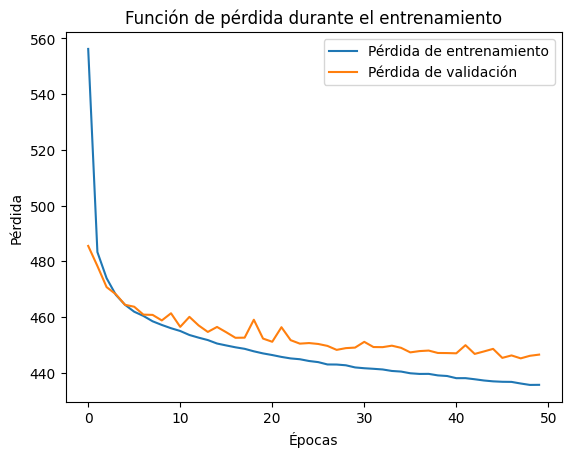

In [10]:
"""
Graficar la función de pérdida
"""
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Función de pérdida durante el entrenamiento')
plt.show()

#### Evaluación

In [11]:
"""
Evaluar el modelo en el conjunto de prueba
"""
loss, mae = model.evaluate(X_test, y_test)
print(f"MAE en el conjunto test: {mae}")

713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 447.0406 - mae: 17.1712
MAE en el conjunto test: 17.103858947753906


#### Predicciones

In [12]:
"""
Hacer predicciones y compararlas con los valores reales
"""
import pandas as pd

predictions = model.predict(X_test)
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': predictions.flatten()})
print(comparison.head())

713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
   Actual  Predicted
0      50  36.810398
1      11   6.255890
2       0  20.718391
3       0  28.099354
4      57  36.308304


""" Hacer una prueba de funcionamiento """

In [13]:
"""
Seleccionar una canción en específico
"""
nombre_cancion = "Beso"

canciones_df = df[df['track_name'].str.contains(nombre_cancion, case=False, na=False)]

print(f"Canciones encontradas:")
canciones_df[['track_name', 'artists', 'album_name']].head()

Canciones encontradas:


,track_name,artists,album_name
1655,Un Beso de Desayuno,Calle 13,Residente o Visitante
17425,Beso Con Baba,Meth Math;Dinamarca,m♡rtal
21293,Son Tus Besos,Cestar,El Verdadero Amor
23145,El Beso (feat. Mathieu Ruz),Dombresky;Crusy,Toolroom Amsterdam 2022
23927,El Beso (feat. Mathieu Ruz),Dombresky;Crusy,El Beso (feat. Mathieu Ruz)


""" Hacer una predicción """

In [14]:
# indice a selecionar
i = 0
cancion = canciones_df.iloc[i]
X_input = cancion[features].values.reshape(1, -1)
X_input = scaler.transform(X_input)

prediccion = model.predict(X_input)[0][0]
print(f"Canción: {cancion['track_name']} - {cancion['artists']}")
print(f"Popularidad real: {cancion['popularity']}")
print(f"Predicción: {prediccion:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
Canción: Un Beso de Desayuno - Calle 13
Popularidad real: 20
Predicción: 37.71


#### Otras métricas

In [15]:
"""
Evaluar el modelo en el conjunto de prueba
"""
from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(y_test, predictions)
print(f'R²: {r2}')

mse = mean_squared_error(y_test, predictions)
print(f'MSE: {mse}')

R²: 0.10299539566040039
MSE: 442.6546630859375
